In [1]:
from pm4py.objects.log.importer.xes import importer as xes_importer
import pm4py
import pandas as pd
import pickle
from bac_utils import fix_bac_res
from dateutil import parser
from tqdm import tqdm
from collections import Counter

pd.options.mode.chained_assignment = None  # default='warn'

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [2]:
# # For BAC
# case_id_name = 'REQUEST_ID'
# activity_column_name = 'ACTIVITY'
# resource_column_name = 'CE_UO'
# start_date_name = "start:timestamp"
# end_date_name = "time:timestamp"
# outcome_name = "leadtime"

# BPI17
case_id_name = 'case:concept:name'  # The case identifier column name.
start_date_name = 'start:timestamp_'
end_date_name = 'time:timestamp_'
activity_column_name = "concept:name"
resource_column_name = "org:resource"
outcome_name = 'leadtime'

# # BPI13
# case_id_name = 'SR_Number'  # The case identifier column name.
# end_date_name = 'timestamp'
# activity_column_name = "ACTIVITY"
# resource_column_name = "Involved_ST"
# outcome_name = "lead_time"

# Generating data for simulation (B)

In [3]:
%cd /Users/amyle/UNIPD/PhD/DiCE/Consulta/

/Users/amyle/UNIPD/PhD/DiCE/Consulta


In [4]:
from utils.simulation_functions import preparing_data_for_simulation

In [5]:
# result_df = pd.read_csv("./bpi17_after/results_bpi17_after_095_03_3.csv")
result_df = pd.read_csv("./bpi17/results_ale_099.csv")

In [6]:
result_df

,case:concept:name,pos_status,true_outcome,predicted_outcome,init_next_activity,Next_activity,Next_resource,predicted_rec
0,Application_1003257895,1,4155062.0,3.565917e+06,A_Validating,A_Cancelled,User_14,2.552059e+06
1,Application_1005586643,0,604954.0,1.303220e+06,O_Sent (mail and online),O_Sent (mail and online),User_3,1.303220e+06
2,Application_1006959642,0,590353.0,1.309079e+06,O_Create Offer,O_Create Offer,User_71,1.309079e+06
3,Application_1007607428,1,2732064.0,1.099949e+06,A_Accepted,A_Accepted,User_42,1.685120e+06
4,Application_1009327734,1,3497794.0,7.474281e+05,O_Create Offer,O_Create Offer,User_52,7.821361e+05
...,...,...,...,...,...,...,...,...
1230,Application_986694126,1,2954205.0,8.786168e+05,O_Created,O_Created,User_60,1.166641e+06
1231,Application_990181012,1,3806866.0,1.608469e+06,O_Sent (mail and online),A_Denied,User_115,8.868416e+05
1232,Application_991699701,0,759001.0,1.035579e+06,O_Returned,O_Returned,User_123,1.035579e+06
1233,Application_997024654,0,758287.0,5.618740e+05,O_Create Offer,O_Create Offer,User_42,5.618740e+05


In [7]:
# test_log = pd.read_csv("./bpi17_after/test_log_with_tsplit.csv")
test_log = pd.read_csv("./bpi17/test_log_with_tsplit.csv")

In [8]:
# Path for saving the data for running simulation
# path_name = "./PM_Simulation/data/rec_bpi17_after_095_03_3.csv"
path_name = "./PM_Simulation/data/rec_bpi17_ale_099.csv"

In [9]:
# test_log = test_log.rename(columns={"time:timestamp_":"time:timestamp", "start:timestamp_":"start:timestamp"})

In [10]:
# test_log.to_csv("./bpi17/test_log_with_tsplit.csv", index=False)

In [11]:
# def preparing_data_for_simulation_(result_df, test_log, path_name, case_id_name, end_date_name, test_time):
#     # Generating dataframe with repl_id, act_1, res_1, starting_time
#     test_log_ids = result_df[case_id_name].unique()
#     simu_df = pd.DataFrame(columns=["case:concept:name", "repl_id", "act_1", "res_1", "starting_time"])
#     simu_df["case:concept:name"] = test_log_ids
        
#     for i, idx in enumerate(test_log_ids):
#         trace_df = test_log[test_log[case_id_name] == idx]
#         trace_history = trace_df[case_id_name].tolist() # List of prefix history
#         simu_df['repl_id'][i] = len(trace_history) - 1
#         simu_df["act_1"][i] = result_df["Next_activity"][i]
#         simu_df["res_1"][i] = result_df["Next_resource"][i]
#         simu_df["starting_time"][i] = test_time[idx]
    
#     simu_df.to_csv(path_name, index=False)

In [12]:
preparing_data_for_simulation(result_df, test_log, path_name, case_id_name, end_date_name)

### Computing resources freetime

In [13]:
# log = pm4py.read_xes("/Users/amyle/UNIPD/PhD/DiCE/Consulta/bpi17/log_before.xes")

In [14]:
# df = pm4py.convert_to_dataframe(log)

In [15]:
# df = df.astype({resource_column_name: str})
# df = df.astype({"NEXT_RESOURCE": str})

In [16]:
# list_resources = df["org:resource"].unique().tolist()

In [17]:
# len(list_resources)

In [18]:
# res_free_time = {}
# for res in list_resources:
#    res_free_time[res] = parser.parse("2016-02-13 00:00:00")

In [19]:
# pickle.dump(res_free_time, open("./PM_Simulation/data/resources_times_bpi17.pkl", "wb"))  # save it into a file named save.p

# Running simulation (C)


In [20]:
%cd /Users/amyle/UNIPD/PhD/DiCE/Consulta/PM_Simulation/

/Users/amyle/UNIPD/PhD/DiCE/Consulta/PM_Simulation


In [21]:
from SimulatorRecs import run_simulation_recommendations

In [22]:
# # BPI17
log = xes_importer.apply("./data/log_before.xes")
net, initial_marking, final_marking = pm4py.read_pnml('./data/model_bpi17.pnml')
# net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log, noise_threshold=0.2)
recommendations_df = pd.read_csv('./data/rec_bpi17_ale_099.csv') # => CHANGE PATH HERE!!!

t_split = "2016-02-13 00:00:00" #bpi17 new
# t_split = "2019-02-19 17:00:00" #bac_new
# t_split = "2010-03-31 17:00:00" #bpi13
# t_split = "2016-12-01 00:00:00" # bpi17 after
# t_split = "2012-01-15 12:01:01" # Consulta

# t_split = "2016-05-29 19:10:28" # BPI17
# t_split = "2011-10-20 22:27:23.728126" # Synthetic data

with open('./data/resources_times_bpi17.pkl', 'rb') as file:
   res_availability = pickle.load(file)

# res_availability = res_free_time

# log attributes usefull for recommendations
# data_attributes = ['ApplicationType', 'LoanGoal', 'RequestedAmount']
# categorical_attributes = ['ApplicationType', 'LoanGoal']  # specify those that are categorical

path_simulations = './simulation_results/bpi17/ale_099/' # => CHANGE PATH HERE!!! # if None it doesn't save 

parsing log, completed traces ::   0%|          | 0/12207 [00:00<?, ?it/s]

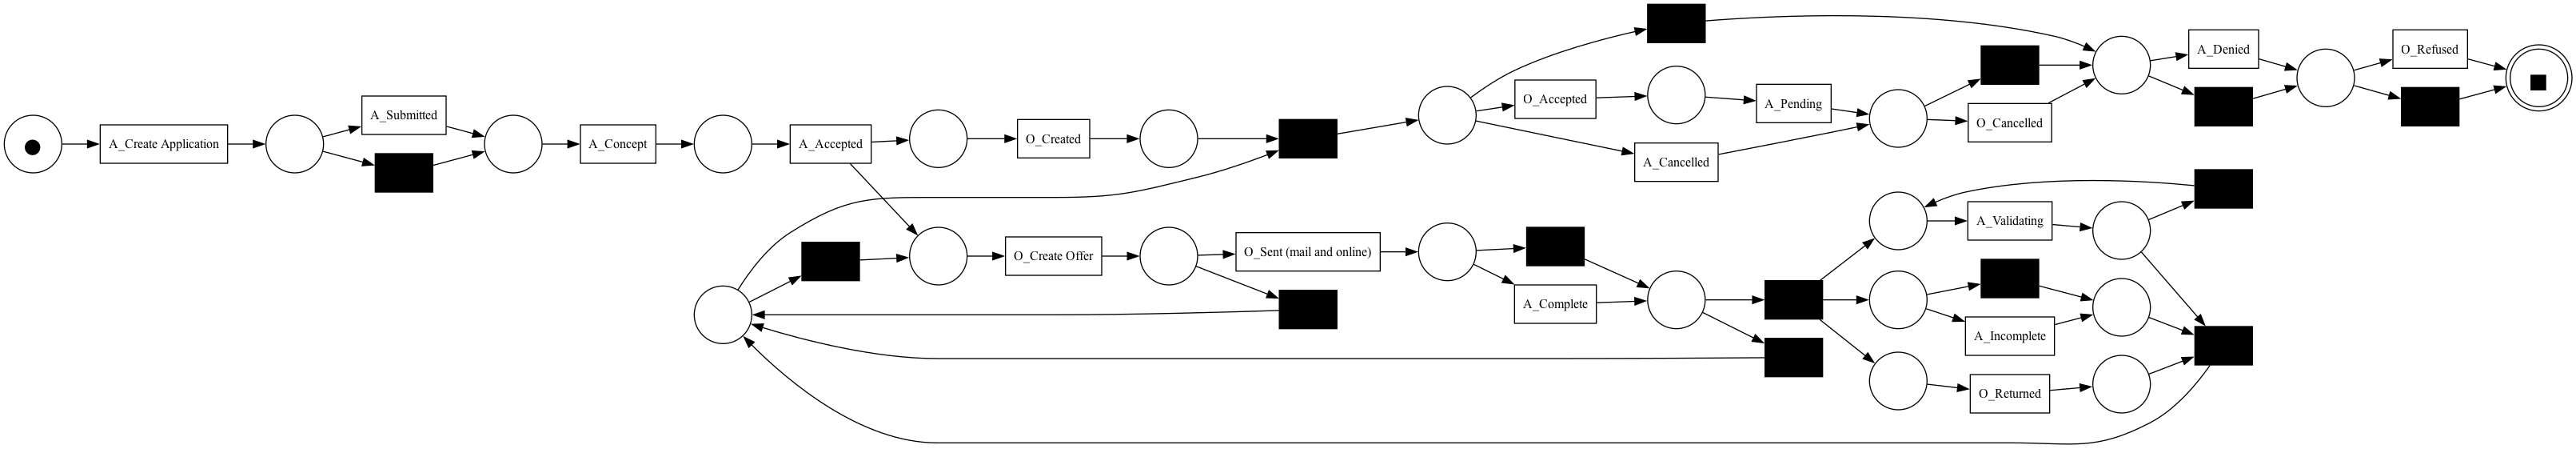

In [23]:
pm4py.view_petri_net(net, initial_marking, final_marking)

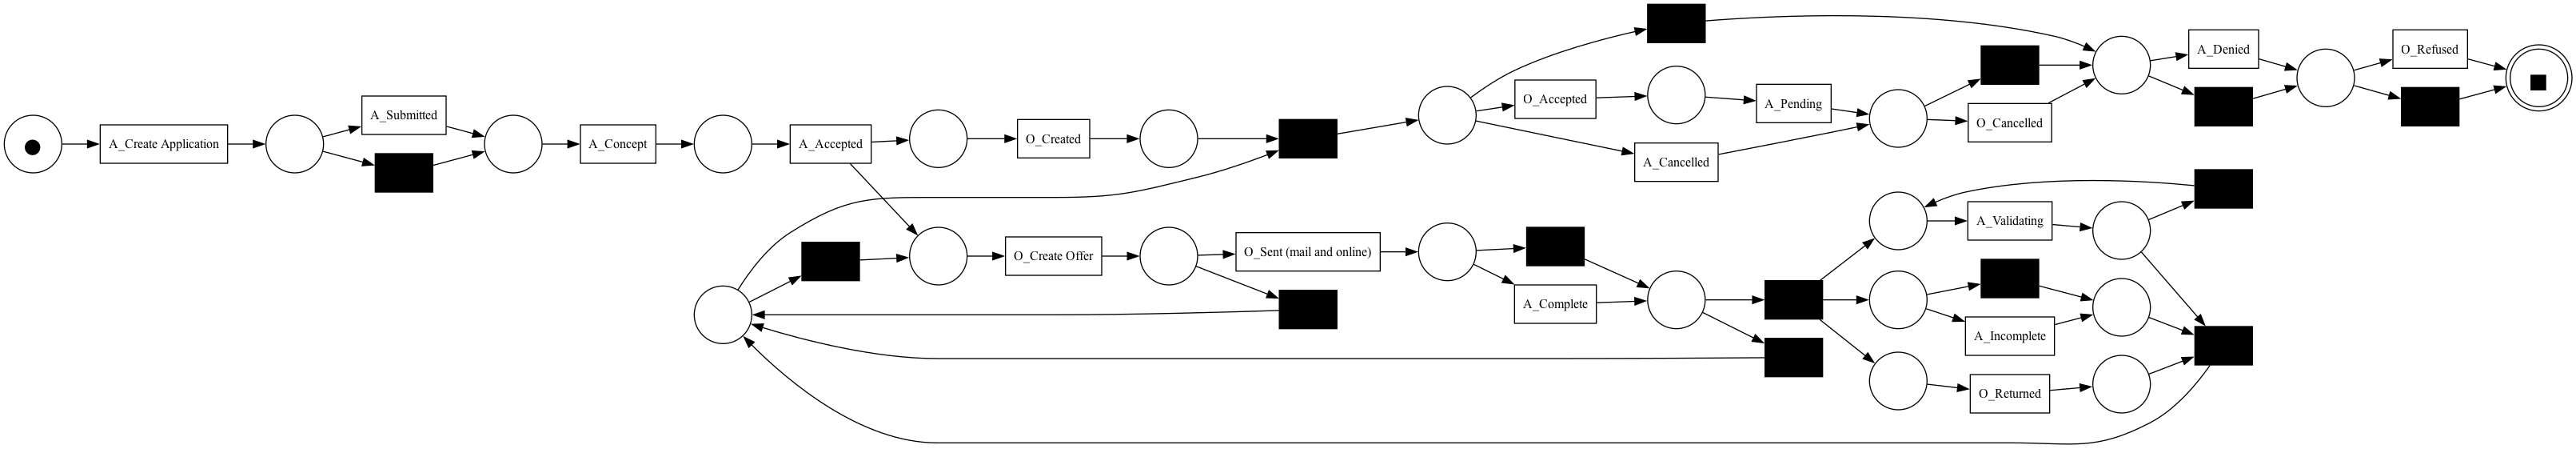

In [24]:
# net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log, noise_threshold=0)
pm4py.view_petri_net(net, initial_marking, final_marking)

In [25]:
#df = pd.read_csv('C:/DIEM/recommender_module/production/production_processed.csv')
#df = df.astype({resource_column_name: str})
#df[start_date_name] = [parser.parse(i).replace(tzinfo=None) for i in df[start_date_name]]
#df[end_date_name] = [parser.parse(i).replace(tzinfo=None) for i in df[end_date_name]]
#event_log = pm4py.format_dataframe(df, case_id='case:concept:name',
#                                   activity_key='concept:name', timestamp_key='time:timestamp', start_timestamp_key='start:timestamp')
#pm4py.write_xes(event_log, 'C:/DIEM/recommender_module/production/production_event_log.xes')

In [26]:
# # BAC 
# log = xes_importer.apply('./data/log_bac.xes')
# net, initial_marking, final_marking = pm4py.read_pnml('./data/model_bac.pnml')
# recommendations_df = pd.read_csv('./data/rec_bpi17_05_09_3.csv') # => CHANGE PATH HERE!!!

# t_split = "2019-02-09 02:36:57"

# with open('./data/resources_times_bac.pkl', 'rb') as file:
#     res_availability = pickle.load(file)

In [27]:
recommendations_df

,case:concept:name,repl_id,act_1,res_1,starting_time
0,Application_1003257895,18,A_Cancelled,User_14,2016-05-28 12:23:50.533000+00:00
1,Application_1005586643,4,O_Sent (mail and online),User_3,2016-05-26 17:34:09.763000+00:00
2,Application_1006959642,3,O_Create Offer,User_71,2016-05-24 12:29:30.888000+00:00
3,Application_1007607428,2,A_Accepted,User_42,2016-05-11 17:07:06.057000+00:00
4,Application_1009327734,3,O_Create Offer,User_52,2016-04-20 19:59:25.764000+00:00
...,...,...,...,...,...
1230,Application_986694126,4,O_Created,User_60,2016-05-23 11:23:04.724000+00:00
1231,Application_990181012,12,A_Denied,User_115,2016-05-18 19:30:05.565000+00:00
1232,Application_991699701,8,O_Returned,User_123,2016-06-03 13:21:45.303000+00:00
1233,Application_997024654,2,O_Create Offer,User_42,2016-05-23 18:41:07.729000+00:00


In [28]:
recommendations_df = recommendations_df.astype({"res_1": str})

In [29]:
# number of simulations to run
n_sim = 10

In [30]:
# For BPI17
recommendations_df["starting_time"] = [str(parser.parse(recommendations_df["starting_time"][i]).strftime("%Y-%m-%d %H:%M:%S")) for i in range(len(recommendations_df))]

In [31]:
# recommendations_df["starting_time"] = t_split

In [32]:
recommendations_df

,case:concept:name,repl_id,act_1,res_1,starting_time
0,Application_1003257895,18,A_Cancelled,User_14,2016-05-28 12:23:50
1,Application_1005586643,4,O_Sent (mail and online),User_3,2016-05-26 17:34:09
2,Application_1006959642,3,O_Create Offer,User_71,2016-05-24 12:29:30
3,Application_1007607428,2,A_Accepted,User_42,2016-05-11 17:07:06
4,Application_1009327734,3,O_Create Offer,User_52,2016-04-20 19:59:25
...,...,...,...,...,...
1230,Application_986694126,4,O_Created,User_60,2016-05-23 11:23:04
1231,Application_990181012,12,A_Denied,User_115,2016-05-18 19:30:05
1232,Application_991699701,8,O_Returned,User_123,2016-06-03 13:21:45
1233,Application_997024654,2,O_Create Offer,User_42,2016-05-23 18:41:07


In [33]:
# PREPROCESSING RECOMMENDATIONS DF
recommendations_df = recommendations_df[~(recommendations_df['act_1'].isna())]
recommendations_df = recommendations_df[recommendations_df['res_1'] != 'missing']
recommendations_df = recommendations_df.fillna('missing')
recommendations_df.index = range(len(recommendations_df))
# recommendations_df['repl_id'] -= 1

In [34]:
#  # PREPROCESSING RECOMMENDATIONS DF (BAC)
# res_columns = [c for c in recommendations_df.columns if c.split('_')[0]=='res']
# for res in res_columns:
#     recommendations_df[res] = recommendations_df[res].apply(lambda x: fix_bac_res(x))

In [35]:
# for res, time in res_availability.items():
#     res_availability[res] = parser.parse(t_split)

In [36]:
recommendations_df

,case:concept:name,repl_id,act_1,res_1,starting_time
0,Application_1003257895,18,A_Cancelled,User_14,2016-05-28 12:23:50
1,Application_1005586643,4,O_Sent (mail and online),User_3,2016-05-26 17:34:09
2,Application_1006959642,3,O_Create Offer,User_71,2016-05-24 12:29:30
3,Application_1007607428,2,A_Accepted,User_42,2016-05-11 17:07:06
4,Application_1009327734,3,O_Create Offer,User_52,2016-04-20 19:59:25
...,...,...,...,...,...
1230,Application_986694126,4,O_Created,User_60,2016-05-23 11:23:04
1231,Application_990181012,12,A_Denied,User_115,2016-05-18 19:30:05
1232,Application_991699701,8,O_Returned,User_123,2016-06-03 13:21:45
1233,Application_997024654,2,O_Create Offer,User_42,2016-05-23 18:41:07


In [37]:
path_simulations = "./simulation_results/bpi17/ale_099/"

In [38]:
# simulations_df is a list of pandas dataframe: each one correspond to a simulated event log

simulations_df = run_simulation_recommendations(log, net, initial_marking, final_marking, recommendations_df, t_split, res_availability, [], [], n_sim, path_simulations, 
                                                mode_ex_time='resource')

aligning log, completed variants ::   0%|          | 0/1230 [00:00<?, ?it/s]

100%|██████████| 1235/1235 [00:03<00:00, 388.71it/s]


SIM. 1


100%|██████████| 1235/1235 [00:14<00:00, 84.70it/s] 


SIM. 2


100%|██████████| 1235/1235 [00:14<00:00, 85.43it/s]


SIM. 3


100%|██████████| 1235/1235 [00:14<00:00, 86.24it/s]


SIM. 4


100%|██████████| 1235/1235 [00:14<00:00, 82.50it/s]


SIM. 5


100%|██████████| 1235/1235 [00:14<00:00, 85.54it/s] 


SIM. 6


100%|██████████| 1235/1235 [00:14<00:00, 86.74it/s]


SIM. 7


100%|██████████| 1235/1235 [00:15<00:00, 80.16it/s] 


SIM. 8


100%|██████████| 1235/1235 [00:14<00:00, 84.95it/s]


SIM. 9


100%|██████████| 1235/1235 [00:14<00:00, 84.18it/s]


SIM. 10


100%|██████████| 1235/1235 [00:14<00:00, 82.52it/s]


7.77% not possible recommendations.


## Preprocessing

Getting starting time for BPI13

In [39]:
# df = pd.read_csv("/Users/amyle/UNIPD/PhD/DiCE/Consulta/bpi13/untitled folder 2/bpi_2013_orig.csv")

In [40]:
# test_log = pd.read_csv("/Users/amyle/UNIPD/PhD/DiCE/Consulta/bpi13/test_log_with_tsplit.csv")

In [41]:
# test_log_ids = test_log['SR_Number'].unique()

In [42]:
# test_time = {}

In [43]:
# for i, idx in enumerate(test_log_ids):
#     trace_df = df[df["SR_Number"] == idx]
#     test_trace = test_log[test_log["SR_Number"] == idx]
#     pos = test_trace.shape[0] - 1
#     time = trace_df.iloc[pos]['timestamp']
#     test_time[idx] = time

In [44]:
# test_time

Getting starting time for original log

In [45]:
# log_ori = pd.read_csv("/Users/amyle/UNIPD/PhD/DiCE/Consulta/bpi13/untitled folder 2/bpi_2013_orig.csv")

In [46]:
# log_ori

In [47]:
# log_ori['start:timestamp'] = ""

In [48]:
# case_ids = log_ori['SR_Number'].unique()

In [49]:
# i = 0
# for id in case_ids:
#     trace_df = log_ori[log_ori[case_id_name] == id]
#     trace_indexes = trace_df.index
#     for ind in trace_indexes:
#         if ind == trace_df.index.min():
#             log_ori["start:timestamp"][i] = log_ori[end_date_name][i]
#             i += 1
#         else:
#             log_ori["start:timestamp"][i] = log_ori[end_date_name][i-1]
#             i += 1

In [50]:
# log_ori = log_ori.rename(columns={"timestamp" : "time:timestamp",
#                          "Involved_ST": "org:resource", "ACTIVITY": "concept:name",
#                           "SR_Number": "case:concept:name"})

In [51]:
# log_ori

In [52]:
# log_ori[log_ori.columns[11]] = [parser.parse(i) for i in log_ori.iloc[:, 11]]
# log_ori[log_ori.columns[9]] = [parser.parse(i) for i in log_ori.iloc[:, 9]]

In [53]:
# log = pm4py.convert_to_event_log(log_ori, case_id_key="case:concept:name", activity_column = "concept:name", timestamp_column = "time:timestamp", start_timestamp_key = 'start:timestamp')

In [54]:
# pm4py.write_xes(log, "/Users/amyle/UNIPD/PhD/DiCE/Consulta/bpi13/bpi13_log.xes", case_id_key="SR_Number", activity_column = "ACTIVITY", timestamp_column = "time:timestamp", start_timestamp_key = 'start:timestamp')

In [55]:
# log[0][0]